# The Hello World of Machine Learning

This is a small project to practice machine learning on the classification of iris flowers. The dataset is good and small enough. 
- It is a classification problem, allowing us to practice with an easier type of supervised learning algorithm.
- It is  multiclass classification problem (multi-nominal) that may require some special handling.
- It has only 4 features and 150 rows, which is small and easily fit into memory.
- It has numeric attributes and all these numeric attributes are in the same units and the same scale not requiring any special scaling or transformations to get started.

Here is an overview of what we are going to cover:
* Loading the dataset.
* Summarising the dataset.
* Visualising the dataset.
* Evaluating some algorithms.
* Making some predictions.

## Loading the Data

We begin by loading some libraries and the iris dataset.

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
plt.style.use('ggplot')
%matplotlib inline

# load dataset
filename = 'iris.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(filename, names=names)

## Summarising the Dataset

We first get the dimensions of the data and the have a peek at it. The shape property tells us that there's 150 rows and 5 columns.

In [2]:
# shape
dataset.shape

(150, 5)

In [3]:
# peeking with head
dataset.head(20)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Statistical Summary

Next we look at a summary of each feature. Where we see that all of the numerical features have the same scale (centimeters) and similar ranges between 0 and 8 centimeters. Also, we don't have any missing values so our data is clean.

In [4]:
# descriptions
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Class Distribution
Let's now look at the number of rows that belong to each class. We see that each class has the same number of rows (50 or 33% of the dataset)

In [5]:
# class distribution
dataset['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

## Data Visualisation
We can extend our basic idea about the data with the help of visualisations. We are going to look at the two types of plots:
* Univariate plots to better understand each attribute.
* Multivariate plots to better understand the relationships between attributes.

### Univariate Plots

We will start with some univariate plots, that is, plots of each individual variable. Given that the input variables are numeric, we can create box and whisker plots of each.

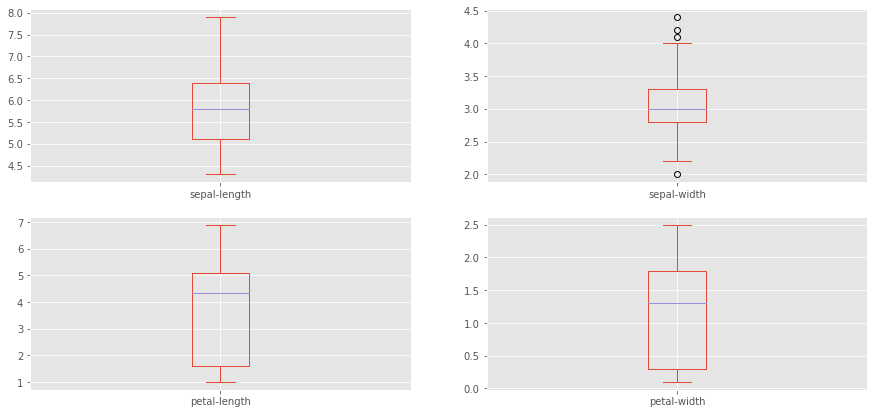

In [6]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(15,7))
plt.show()

We can also create a histogram of each input variable to get an idea of the distribution.

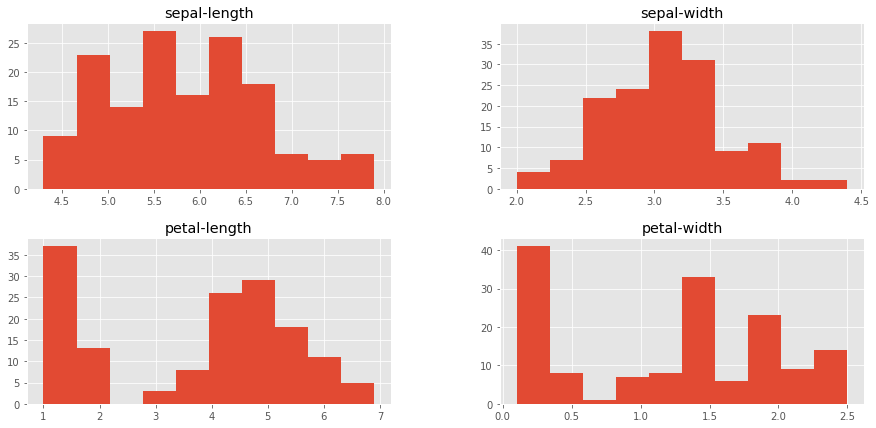

In [7]:
# histograms
dataset.hist(figsize=(15,7))
plt.show()

It looks like perhaps two of the input variables have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.

### Multivariate Plots
Now we can look at the interactions between the variables. Let's look at scatter plots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

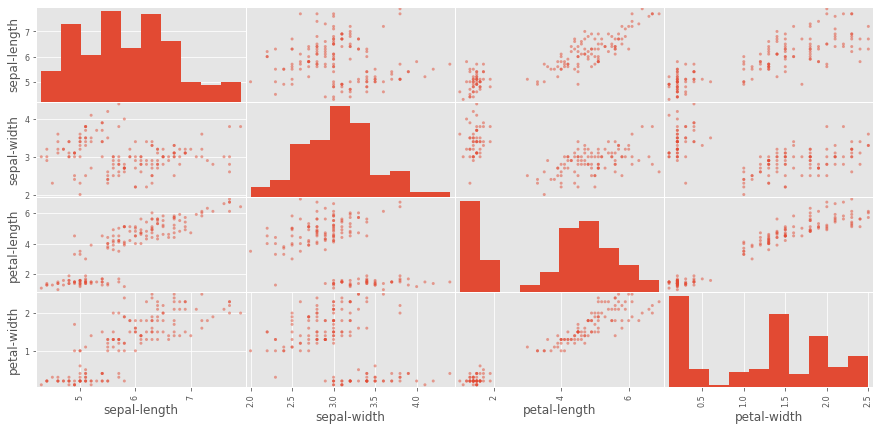

In [8]:
# Scatter plot Matrix
scatter_matrix(dataset, figsize=(15,7))
plt.show()

We note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.

## Evaluate Some Algorithms

Now it is time to create some models of the data and estimate their accuracy on unseen data.
Here is what we are going to cover in this step:

* Separate out a validation dataset.
* Setup the test harness to use 10-fold cross validation.
* Build 6 different models to predict species from flower measurements
* Select the best model.

### Creating a Validation Dataset
The model that we create we need to know whether or not is any good. Later, we will utilise statistical methods to estimate the accuracy of the models that we create on unseen data. We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data. That is, we are going to hold back some data that the algorithms will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be. We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.


In [9]:
# Split-out validation dataset
from sklearn.model_selection import train_test_split
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

We now have training data in the X_train and Y_train for preparing models and a X_validation and Y_validation sets that we can use later.


### Test Harness
We will use 10-fold cross validation to estimate accuracy. This will split our dataset into 10
parts, train on 9 and test on 1 and repeat for all combinations of train-test splits. We are using
the metric of *accuracy* to evaluate models. This is a ratio of the number of correctly predicted
features divided by the total number of features in the dataset multiplied by 100 to give a
percentage (e.g. 99% accurate). We will be using the scoring variable when we run build and
evaluate each model next.

## Build Models
We don't know which algorithms would be a good fit on this problem or what configurations to use.
We get an idea from the plots that some of the classes are partially linearly separable in some
dimensions, so we are expecting generally good results. Let's evaluate six different algorithms:

* Logistic Regression (LR).
* Linear Discriminant Analysis (LDA).
* k-Nearest Neighbors (KNN).
* Classification and Regression Trees (CART).
* Gaussian Naive Bayes (NB).
* Support Vector Machines (SVM).

This list is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NBand SVM) algorithms. 
We reset the random number seed before each run to ensure that the evaluation of each algorithm is 
performed using exactly the same data splits. It ensures the results are directly comparable. 
Let's build and evaluate our six models:

In [10]:
# load models
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [11]:
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=10000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "{0}: {1} ({2})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.9666666666666668 (0.053748384988656986)
LDA: 0.9800000000000001 (0.030550504633038926)
KNN: 0.9533333333333334 (0.052068331172711015)
CART: 0.9666666666666668 (0.053748384988656986)
NB: 0.9533333333333334 (0.06699917080747259)
SVM: 0.9600000000000002 (0.053333333333333316)


From above we got the raw results of the 6 models and their accuracy estimations for each. We need to  compare the models to each other and select select the most accurate.
Which we can see that LDA looks like has the largest estimated accuracy score. We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).

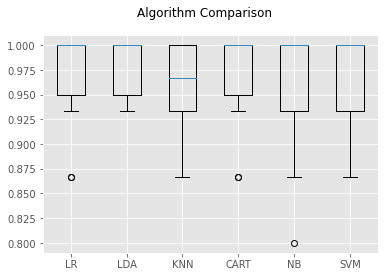

In [12]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see that the box and whisker plots are squashed at the top of the range, with many samples achieving 100% accuracy.

## Making Predictions

The LDA algorithm was the most accurate model that we tested. Now we want to get an idea
of the accuracy of the model on our validation dataset. This will give us an independent final
check on the accuracy of the best model. It is important to keep a validation set just in case
we made a slip during training, such as overfitting to the training set or a data leak. Both
will result in an overly optimistic result. We can run the LDA model directly on the validation
set and summarize the results as a final accuracy score, a confusion matrix and a classification
report.


In [13]:
# Make predictions on validation dataset
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



We can see that the accuracy is 0.966 or 96.7%. The confusion matrix provides an indication of
the one error made. Finally the classification report provides a breakdown of each class by precision, 
recall, f1-score and support showing excellent results (granted the validation dataset was small).

# Summary

This concludes our project. We worked on a small multiclass classification problem were fitted 6 models
to best spot the pattern in the data. We concluded with the LDA algorithm producing the best model which had an accuracy of 97% on the validation dataset.